In [1]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [2]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\input_layer_4_6_16_2.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:100000, :]
x_test = input_data[100000:105000, :]


(105000, 24)


In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\output_layer_4_6_16_2.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:100000, :]
y_test = output_data[100000:105000, :]
print(output_data.shape)

(105000, 12)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(150, input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.007)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 150, verbose = 2, validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/150
100000/100000 - 3s - loss: 0.4023 - accuracy: 0.8336 - val_loss: 0.3263 - val_accuracy: 0.8508
Epoch 2/150
100000/100000 - 2s - loss: 0.2893 - accuracy: 0.8692 - val_loss: 0.2580 - val_accuracy: 0.8845
Epoch 3/150
100000/100000 - 2s - loss: 0.2385 - accuracy: 0.8927 - val_loss: 0.2275 - val_accuracy: 0.8965
Epoch 4/150
100000/100000 - 2s - loss: 0.2182 - accuracy: 0.9011 - val_loss: 0.2188 - val_accuracy: 0.9015
Epoch 5/150
100000/100000 - 2s - loss: 0.2066 - accuracy: 0.9062 - val_loss: 0.2068 - val_accuracy: 0.9079
Epoch 6/150
100000/100000 - 2s - loss: 0.1930 - accuracy: 0.9136 - val_loss: 0.1863 - val_accuracy: 0.9180
Epoch 7/150
100000/100000 - 2s - loss: 0.1815 - accuracy: 0.9188 - val_loss: 0.1774 - val_accuracy: 0.9208
Epoch 8/150
100000/100000 - 2s - loss: 0.1721 - accuracy: 0.9220 - val_loss: 0.1750 - val_accuracy: 0.9221
Epoch 9/150
100000/100000 - 2s - loss: 0.1644 - accuracy: 0.9246 - val_loss: 0.1640 - val_accu

Epoch 77/150
100000/100000 - 2s - loss: 0.0650 - accuracy: 0.9724 - val_loss: 0.0819 - val_accuracy: 0.9666
Epoch 78/150
100000/100000 - 2s - loss: 0.0641 - accuracy: 0.9729 - val_loss: 0.0751 - val_accuracy: 0.9684
Epoch 79/150
100000/100000 - 2s - loss: 0.0627 - accuracy: 0.9736 - val_loss: 0.0812 - val_accuracy: 0.9676
Epoch 80/150
100000/100000 - 2s - loss: 0.0630 - accuracy: 0.9735 - val_loss: 0.0763 - val_accuracy: 0.9689
Epoch 81/150
100000/100000 - 2s - loss: 0.0644 - accuracy: 0.9729 - val_loss: 0.0773 - val_accuracy: 0.9676
Epoch 82/150
100000/100000 - 2s - loss: 0.0636 - accuracy: 0.9734 - val_loss: 0.0702 - val_accuracy: 0.9714
Epoch 83/150
100000/100000 - 2s - loss: 0.0615 - accuracy: 0.9741 - val_loss: 0.0801 - val_accuracy: 0.9678
Epoch 84/150
100000/100000 - 2s - loss: 0.0619 - accuracy: 0.9742 - val_loss: 0.0753 - val_accuracy: 0.9698
Epoch 85/150
100000/100000 - 2s - loss: 0.0629 - accuracy: 0.9739 - val_loss: 0.0774 - val_accuracy: 0.9689
Epoch 86/150
100000/100000 -

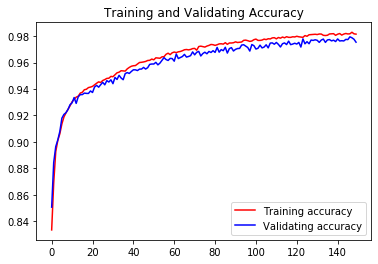

In [6]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [7]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Look_ahead_N\\Look_ahead_N_4_6_16_2_model.h5')

In [16]:
#json_string  = model.to_json()
#with open("C:\\Users\\Wilfred\\Desktop\\json_model.json", "w") as json_file:
#    json_file.write(json_string)

In [5]:
#model.save_weights('C:\\Users\\Wilfred\\Desktop\\Look_ahead_N_4_6_15_2_weights.h5')